<a href="https://colab.research.google.com/github/Mallika0312/Clothing-images-classification/blob/main/Clothing_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 8.2 MB/s 
     |████████████████████████████████| 98 kB 9.5 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds 
tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
import logging
logger= tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
class_names =metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# **Print the number of training and test data examples**

In [6]:
num_training_examples= metadata.splits['train'].num_examples 
num_test_examples= metadata.splits['test'].num_examples
print('No. of training examples: {}' .format(num_training_examples))
print('No. of test examples: {}' .format(num_test_examples))

No. of training examples: 60000
No. of test examples: 10000


# Data pre processing


In [7]:
#normalising the data
def normalize(images, labels):
  images=tf.cast(images, tf.float32)
  images /=255
  return images, labels

train_dataset= train_dataset.map(normalize)
test_dataset= test_dataset.map(normalize)

train_dataset= train_dataset.cache()
test_dataset= test_dataset.cache()


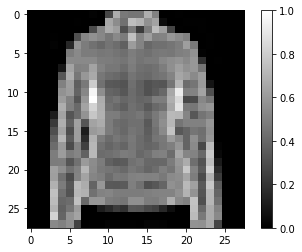

In [8]:
#exploring the processed data 
for image, label in test_dataset.take(1):
  break
image= image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image ,cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)
plt.show()




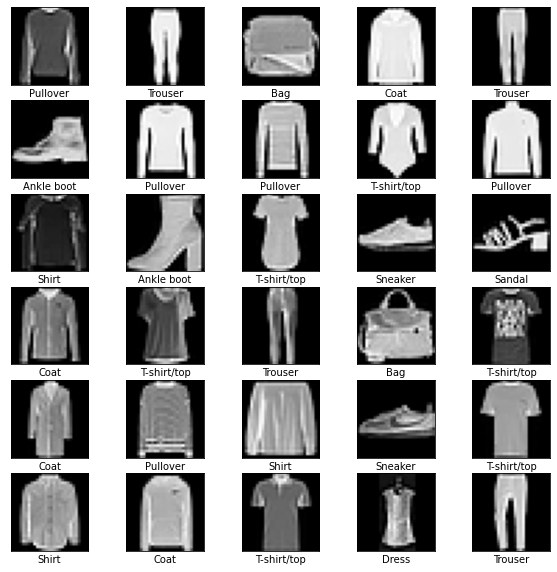

In [9]:
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(train_dataset.take(30)):
  image=image.numpy().reshape((28,28))
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.gray)
  plt.xlabel(class_names[label])
plt.show()



# Building the Model


Setting up the layers for the neural network 

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compiling the model by adding a loss function, optimizer and metrics.**

In [11]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [12]:
BATCH_SIZE=32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset=test_dataset.cache().batch(BATCH_SIZE)


In [13]:
#training the model by using model.fit
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_training_examples/BATCH_SIZE))


Epoch 1/10
1875/1875 [==============================] - 21s 3ms/step - loss: 0.3869 - accuracy: 0.8598
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570 - accuracy: 0.9069
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2100 - accuracy: 0.9230
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1808 - accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1537 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1294 - accuracy: 0.9528
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9603
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0902 - accuracy: 0.9659
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9713
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

In [14]:
test_loss, test_accuracy=model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Test Accuracy: ', test_accuracy)
print('Test Loss: ', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.3236 - accuracy: 0.9205
Test Accuracy:  0.9204999804496765
Test Loss:  0.3235780894756317


In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[2]

array([1.43022145e-08, 7.61068812e-12, 2.73032330e-09, 2.10453096e-11,
       1.18738502e-13, 5.38520561e-09, 3.53667184e-09, 3.47419918e-05,
       1.26002342e-11, 9.99965191e-01], dtype=float32)

In [18]:
np.argmax(predictions[2])

9

In [19]:
test_labels[2]

9

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.gray)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_labels]),
                                color=color)

def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('green')
  

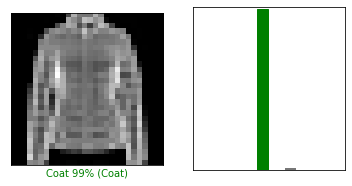

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

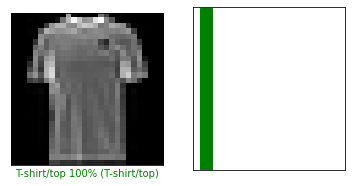

In [26]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

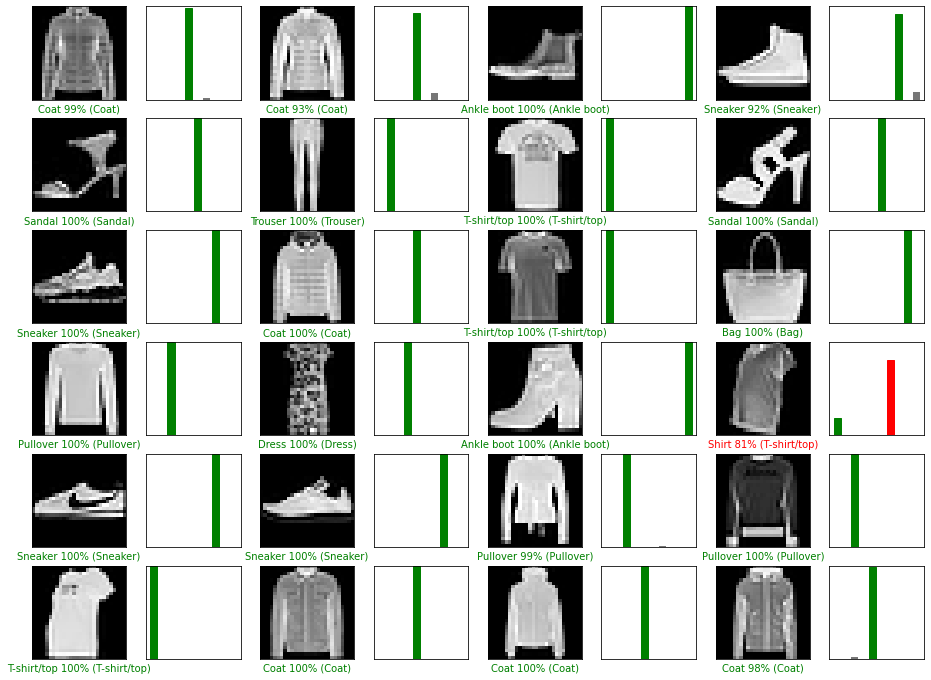

In [25]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [27]:
img=test_images[0]
print(img.shape)

(28, 28, 1)


In [28]:
img=np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.28143707e-09 1.31232026e-14 1.05362684e-04 1.11170058e-12
  9.86975431e-01 1.75254200e-10 1.29191782e-02 3.10680127e-11
  1.74110969e-11 2.09590851e-08]]


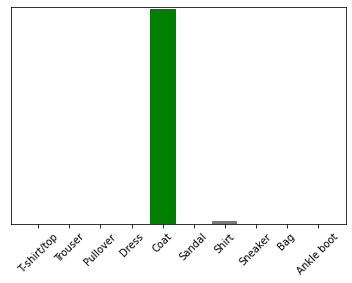

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

4